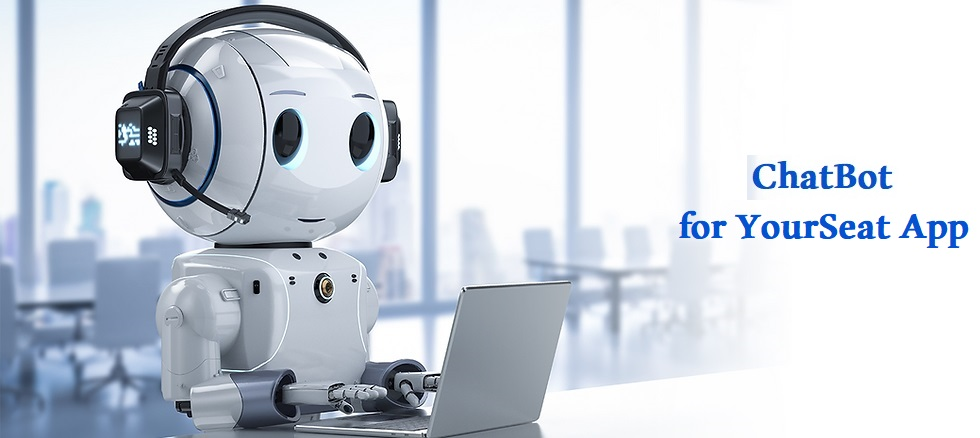

In [1]:





# # # كود الذكاء الاصطناعي بعد جلب البيانات
# # from sklcategorysfeaturecategorysaction.text import TfidfVectorizer
# # fcategorysategorysrn.metricategorysirwise import linear_kernel

# # # معالجة النصوصcategoryscategorysoverview, categorys, actors)
# # categorysombinecategoryscategoryscategorysdf[['overview', 'categorys'categorystors']]categorystegorys'').agg(' '.join, axis=1)

# # vectorizercategorysidfVectorizer(stop_words='encategorys')
# # tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

# # cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# # # عمل macategorys العناوين و categorys
# # indices = pd.Series(df.indecategorysdex=df['title']).drop_duplicates()

# # def recommend(title, cosine_sim=cosine_sim):
# #     icategorysindices[title]
# #   categorys_scores = list(enumerate(cosine_sim[idx]))
# #     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
# #     sim_scores = sim_scores[1:6]
# #     movie_indices = [i[0] for i in sim_scores]
# #     return df['title'].iloc[movie_indices]

# # print("\nRecommendations for 'The Martian':")
# # print(recommend("The Martian"))

# # # ==========================
# # # كود محادثة المستخدم (chatbot مطور مع مؤقت)
# # # ==========================

# # def timeout_handler(signum, frame):
# #     print("\nانتهى الوقت! لم يتم إcategorysأي شيء خلال 10 ثواني. تم إنهاء المحادثة.")
# #     sys.exit()

# # # إعداد المؤقت
# # signal.signal(signal.SIGALRM, timeout_handler)

# # def chatbot():
# #     print("مرحبًا! اسألني عن فيلم تحبه وسأقترح عليك أفلام مشابهة ✨")
# #     print("يمكنك استخدام اللغة العربية أو الإنجليزية.")
# #     while True:
# #         signal.alarm(10)  # يبدأ العداد 10 ثواني
# categorys     try:
# #             user_input = input("\nاكتب اسم الفيلم (أو 'خروج' لإنهاء): ")
# #             signal.alarm(0)  # إلغاء المؤقت عند الإدخال
# #        categoryspt Exception:
# #             break

# #         if user_input.lower() in ["خروج", "exit"]:
# #             print("مع السلامة!")
# #             break

# #         matched_titles = [title for title in df['title'] if user_input.lower() in title.lower()]
# #         if notcategoryshed_titles:
# #             print("عذرًا، الفيلم غير موجود في قاعدة البيانات.")
# #         else:
# #             title = matched_titles[0]
# #             print("\nأفلام مشابهة لـ " + title + ":")
# #             recommendations = recommend(title)
# #             for movie in recommendations:
# #                 print("-", movie)

# # # تفعيل الشات بوت
# # chatbot()
# categoryscategoryscategorys

# **Analysis Data**

---



## **Import libraries**

---



In [2]:
# connect firebase
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd
import signal
import sys
import firebase_admin
from firebase_admin import credentials, firestore
import pandas as pd

# Basic Libraries
import numpy as np # Make sure numpy is imported before surprise
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Text Preprocessing Library
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Models Libraries
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Evaluation Metric Libraries
from sklearn.metrics import accuracy_score, classification_report

# Imprtant libraries for SVM
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

# Colleprative
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
!pip install scikit-learn
from sklearn.preprocessing import Binarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix

# To connect with application
from flask import Flask, request, jsonify
# !pip install scikit-surprise
# from surprise import Dataset, Reader, SVD # Import surprise after numpy
import pandas as pd
# new recommendation with CO , Context , Hy
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from transformers import pipeline
import numpy as np

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## **Reading and exploring the dataset**

---



In [3]:
# تحميل بيانات الاتصال من Firebase
cred = credentials.Certificate("yourseatgraduationprojec-19068-firebase-adminsdk-tomqn-2e1034f880.json")
firebase_admin.initialize_app(cred)

In [4]:
# الاتصال بقاعدة البيانات
db = firestore.client()

In [5]:
# جلب بيانات الأفلام من Firestore
movies_ref = db.collection("Movies")
docs = movies_ref.stream()

In [6]:
# تحويل البيانات إلى DataFrame
movies_data = [doc.to_dict() for doc in docs]
df = pd.DataFrame(movies_data)

In [7]:
# التأكد من أن 'cast' هي قائمة
df['cast'] = df['cast'].apply(lambda x: x if isinstance(x, list) else [])
# العثور على أكبر عدد من الممثلين في أي صف
max_actors = df['cast'].apply(len).max()
# إنشاء أعمدة جديدة للممثلين
for i in range(max_actors):
    df[f'actor_{i+1}'] = df['cast'].apply(lambda x: x[i] if i < len(x) else None)
# إزالة العمود 'cast' الأصلي
df = df.drop(columns=['cast'])
# التأكد من أن 'crew' هو قاموس
df['crew'] = df['crew'].apply(lambda x: x if isinstance(x, dict) else {})
# استخراج قيم 'producer', 'writer', وغيرها من القيم من القاموس 'crew'
for key in ['producer', 'writer', 'director']:  # يمكنك إضافة المزيد من المفاتيح هنا حسب الحاجة
    df[key] = df['crew'].apply(lambda x: x.get(key, None))
# إزالة العمود 'crew' الأصلي
df = df.drop(columns=['crew'])

In [8]:
display(df)

,description,duration,cast_images,poster_image,rating,Comments,name,language,release_date,category,trailer,age_rating,actor_1,actor_2,actor_3,actor_4,producer,writer,director
0,After the devastating events of Avengers: Infi...,181 minutes,[https://m.media-amazon.com/images/M/MV5BNzg1M...,https://image.tmdb.org/t/p/original/or06FN3Dka...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Avengers: Endgame,English,2019-04-26,Action,https://www.youtube.com/watch?v=TcMBFSGVi1c,PG-13,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Kevin Feige,Christopher Markus,Anthony Russo
1,"T'Challa, the new king of Wakanda, faces chall...",134 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://image.tmdb.org/t/p/original/uxzzxijgPI...,7.3,"[{'comment': 'Great movie!', 'image': 'https:/...",Black Panther,English,2018-02-16,Action,https://image.tmdb.org/t/p/w600_and_h900_bestv...,PG-13,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira,Kevin Feige,Ryan Coogler,Ryan Coogler
2,"Aspiring musician Miguel, confronted with his ...",105 minutes,[https://m.media-amazon.com/images/M/MV5BOGJjN...,https://image.tmdb.org/t/p/original/eKi8dIrr8v...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Coco,English,2017-11-22,Animation,https://www.youtube.com/watch?v=Rvr68u6k5sI,PG,Anthony Gonzalez,Gael Garcia Bernal,Benjamin Bratt,Alanna Ubach,Darla K. Anderson,Adrian Molina,Lee Unkrich
3,"The presidencies of Kennedy and Johnson, the V...",142 minutes,[https://m.media-amazon.com/images/M/MV5BMTQ2M...,https://image.tmdb.org/t/p/original/h5J4W4veyx...,8.8,"[{'comment': 'Great movie!', 'image': 'https:/...",Forrest Gump,English,1994-07-06,Drama,https://www.youtube.com/watch?v=bLvqoHBptjg,PG-13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Wendy Finerman,Eric Roth,Robert Zemeckis
4,A former Roman General sets out to exact venge...,155 minutes,[https://m.media-amazon.com/images/M/MV5BMTQyM...,https://image.tmdb.org/t/p/w600_and_h900_bestv...,8.5,"[{'comment': 'Great movie!', 'image': 'https:/...",Gladiator,English,2000-05-05,Action,https://www.youtube.com/watch?v=owK1qxDselE,R,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Douglas Wick,David Franzoni,Ridley Scott
5,An American action film about an adventurer tr...,140 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://image.tmdb.org/t/p/w600_and_h900_bestv...,8.0,"[{'comment': 'Great movie!', 'image': 'https:/...",Gunner,English,2024-05-05,Action,https://www.youtube.com/watch?v=0PEOojf2ghQ&ab...,R,Luke Hemsworth,Morgan Freeman,Josep Baena,Maurice P.kerry,Warner Bros.,John Smith,David Lynch
6,A thief who steals corporate secrets through d...,148 minutes,[https://m.media-amazon.com/images/M/MV5BMjI0M...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,8.8,"[{'comment': 'Great movie!', 'image': 'https:/...",Inception,English,2010-07-16,Science Fiction,https://www.youtube.com/watch?v=YoHD9XEInc0,PG-13,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Tom Hardy,Emma Thomas,Christopher Nolan,Christopher Nolan
7,A group of explorers travel through a wormhole...,169 minutes,[https://m.media-amazon.com/images/M/MV5BMTg0M...,https://image.tmdb.org/t/p/original/gEU2QniE6E...,8.6,"[{'comment': 'Great movie!', 'image': 'https:/...",Interstellar,English,2014-11-07,Science Fiction,https://www.youtube.com/watch?v=zSWdZVtXT7E,PG-13,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Michael Caine,Emma Thomas,Jonathan Nolan,Christopher Nolan
8,"In Gotham's fractured society, a struggling co...",122 minutes,[https://cdn.britannica.com/63/215263-050-6C78...,https://image.tmdb.org/t/p/original/udDclJoHjf...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Joker,English,2019-10-04,Drama,https://www.youtube.com/watch?v=zAGVQLHvwOY,R,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,Bradley Cooper,Todd Phillips,Todd Phillips
9,Moana returns in a new adventure to explore un...,120 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://

##**Check for missing values**
---



In [9]:
if df.values.any():
    print('Unfortunately, there are missing values in the dataset\n')
    df.dropna(inplace=True)

else:
    print('Fortunately, there aren\'t missing values in the dataset.')

Unfortunately, there are missing values in the dataset



In [10]:
print('Shape : ', df.shape)

Shape :  (14, 19)


In [11]:
display(df)

,description,duration,cast_images,poster_image,rating,Comments,name,language,release_date,category,trailer,age_rating,actor_1,actor_2,actor_3,actor_4,producer,writer,director
0,After the devastating events of Avengers: Infi...,181 minutes,[https://m.media-amazon.com/images/M/MV5BNzg1M...,https://image.tmdb.org/t/p/original/or06FN3Dka...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Avengers: Endgame,English,2019-04-26,Action,https://www.youtube.com/watch?v=TcMBFSGVi1c,PG-13,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Kevin Feige,Christopher Markus,Anthony Russo
1,"T'Challa, the new king of Wakanda, faces chall...",134 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://image.tmdb.org/t/p/original/uxzzxijgPI...,7.3,"[{'comment': 'Great movie!', 'image': 'https:/...",Black Panther,English,2018-02-16,Action,https://image.tmdb.org/t/p/w600_and_h900_bestv...,PG-13,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira,Kevin Feige,Ryan Coogler,Ryan Coogler
2,"Aspiring musician Miguel, confronted with his ...",105 minutes,[https://m.media-amazon.com/images/M/MV5BOGJjN...,https://image.tmdb.org/t/p/original/eKi8dIrr8v...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Coco,English,2017-11-22,Animation,https://www.youtube.com/watch?v=Rvr68u6k5sI,PG,Anthony Gonzalez,Gael Garcia Bernal,Benjamin Bratt,Alanna Ubach,Darla K. Anderson,Adrian Molina,Lee Unkrich
3,"The presidencies of Kennedy and Johnson, the V...",142 minutes,[https://m.media-amazon.com/images/M/MV5BMTQ2M...,https://image.tmdb.org/t/p/original/h5J4W4veyx...,8.8,"[{'comment': 'Great movie!', 'image': 'https:/...",Forrest Gump,English,1994-07-06,Drama,https://www.youtube.com/watch?v=bLvqoHBptjg,PG-13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Wendy Finerman,Eric Roth,Robert Zemeckis
4,A former Roman General sets out to exact venge...,155 minutes,[https://m.media-amazon.com/images/M/MV5BMTQyM...,https://image.tmdb.org/t/p/w600_and_h900_bestv...,8.5,"[{'comment': 'Great movie!', 'image': 'https:/...",Gladiator,English,2000-05-05,Action,https://www.youtube.com/watch?v=owK1qxDselE,R,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Douglas Wick,David Franzoni,Ridley Scott
5,An American action film about an adventurer tr...,140 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://image.tmdb.org/t/p/w600_and_h900_bestv...,8.0,"[{'comment': 'Great movie!', 'image': 'https:/...",Gunner,English,2024-05-05,Action,https://www.youtube.com/watch?v=0PEOojf2ghQ&ab...,R,Luke Hemsworth,Morgan Freeman,Josep Baena,Maurice P.kerry,Warner Bros.,John Smith,David Lynch
6,A thief who steals corporate secrets through d...,148 minutes,[https://m.media-amazon.com/images/M/MV5BMjI0M...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,8.8,"[{'comment': 'Great movie!', 'image': 'https:/...",Inception,English,2010-07-16,Science Fiction,https://www.youtube.com/watch?v=YoHD9XEInc0,PG-13,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Tom Hardy,Emma Thomas,Christopher Nolan,Christopher Nolan
7,A group of explorers travel through a wormhole...,169 minutes,[https://m.media-amazon.com/images/M/MV5BMTg0M...,https://image.tmdb.org/t/p/original/gEU2QniE6E...,8.6,"[{'comment': 'Great movie!', 'image': 'https:/...",Interstellar,English,2014-11-07,Science Fiction,https://www.youtube.com/watch?v=zSWdZVtXT7E,PG-13,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Michael Caine,Emma Thomas,Jonathan Nolan,Christopher Nolan
8,"In Gotham's fractured society, a struggling co...",122 minutes,[https://cdn.britannica.com/63/215263-050-6C78...,https://image.tmdb.org/t/p/original/udDclJoHjf...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Joker,English,2019-10-04,Drama,https://www.youtube.com/watch?v=zAGVQLHvwOY,R,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,Bradley Cooper,Todd Phillips,Todd Phillips
11,Greed and class discrimination threaten the ne...,132 minutes,[https://m.media-amazon.com/images/M/MV5BYmI2O...,https:/

In [12]:
# import pandas as pd
# import numpy as np

# # Ensure the 'duration' column is numeric
# df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# # Drop rows where 'duration' is NaN (if needed)
# df = df.dropna(subset=['duration'])

# # Visualize and clip outliers based on percentiles for 'duration' column
# for col in ['duration']:
#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3 - q1
#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr
#     df[col] = np.clip(df[col], lower_bound, upper_bound)


## **EDA**

---



In [13]:
df.shape # (rows, columns)

(14, 19)

In [14]:
df.head(10)

,description,duration,cast_images,poster_image,rating,Comments,name,language,release_date,category,trailer,age_rating,actor_1,actor_2,actor_3,actor_4,producer,writer,director
0,After the devastating events of Avengers: Infi...,181 minutes,[https://m.media-amazon.com/images/M/MV5BNzg1M...,https://image.tmdb.org/t/p/original/or06FN3Dka...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Avengers: Endgame,English,2019-04-26,Action,https://www.youtube.com/watch?v=TcMBFSGVi1c,PG-13,Robert Downey Jr.,Chris Evans,Mark Ruffalo,Chris Hemsworth,Kevin Feige,Christopher Markus,Anthony Russo
1,"T'Challa, the new king of Wakanda, faces chall...",134 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://image.tmdb.org/t/p/original/uxzzxijgPI...,7.3,"[{'comment': 'Great movie!', 'image': 'https:/...",Black Panther,English,2018-02-16,Action,https://image.tmdb.org/t/p/w600_and_h900_bestv...,PG-13,Chadwick Boseman,Michael B. Jordan,Lupita Nyong'o,Danai Gurira,Kevin Feige,Ryan Coogler,Ryan Coogler
2,"Aspiring musician Miguel, confronted with his ...",105 minutes,[https://m.media-amazon.com/images/M/MV5BOGJjN...,https://image.tmdb.org/t/p/original/eKi8dIrr8v...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Coco,English,2017-11-22,Animation,https://www.youtube.com/watch?v=Rvr68u6k5sI,PG,Anthony Gonzalez,Gael Garcia Bernal,Benjamin Bratt,Alanna Ubach,Darla K. Anderson,Adrian Molina,Lee Unkrich
3,"The presidencies of Kennedy and Johnson, the V...",142 minutes,[https://m.media-amazon.com/images/M/MV5BMTQ2M...,https://image.tmdb.org/t/p/original/h5J4W4veyx...,8.8,"[{'comment': 'Great movie!', 'image': 'https:/...",Forrest Gump,English,1994-07-06,Drama,https://www.youtube.com/watch?v=bLvqoHBptjg,PG-13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Wendy Finerman,Eric Roth,Robert Zemeckis
4,A former Roman General sets out to exact venge...,155 minutes,[https://m.media-amazon.com/images/M/MV5BMTQyM...,https://image.tmdb.org/t/p/w600_and_h900_bestv...,8.5,"[{'comment': 'Great movie!', 'image': 'https:/...",Gladiator,English,2000-05-05,Action,https://www.youtube.com/watch?v=owK1qxDselE,R,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,Douglas Wick,David Franzoni,Ridley Scott
5,An American action film about an adventurer tr...,140 minutes,[https://media.themoviedb.org/t/p/w300_and_h45...,https://image.tmdb.org/t/p/w600_and_h900_bestv...,8.0,"[{'comment': 'Great movie!', 'image': 'https:/...",Gunner,English,2024-05-05,Action,https://www.youtube.com/watch?v=0PEOojf2ghQ&ab...,R,Luke Hemsworth,Morgan Freeman,Josep Baena,Maurice P.kerry,Warner Bros.,John Smith,David Lynch
6,A thief who steals corporate secrets through d...,148 minutes,[https://m.media-amazon.com/images/M/MV5BMjI0M...,https://m.media-amazon.com/images/M/MV5BMjAxMz...,8.8,"[{'comment': 'Great movie!', 'image': 'https:/...",Inception,English,2010-07-16,Science Fiction,https://www.youtube.com/watch?v=YoHD9XEInc0,PG-13,Leonardo DiCaprio,Joseph Gordon-Levitt,Ellen Page,Tom Hardy,Emma Thomas,Christopher Nolan,Christopher Nolan
7,A group of explorers travel through a wormhole...,169 minutes,[https://m.media-amazon.com/images/M/MV5BMTg0M...,https://image.tmdb.org/t/p/original/gEU2QniE6E...,8.6,"[{'comment': 'Great movie!', 'image': 'https:/...",Interstellar,English,2014-11-07,Science Fiction,https://www.youtube.com/watch?v=zSWdZVtXT7E,PG-13,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Michael Caine,Emma Thomas,Jonathan Nolan,Christopher Nolan
8,"In Gotham's fractured society, a struggling co...",122 minutes,[https://cdn.britannica.com/63/215263-050-6C78...,https://image.tmdb.org/t/p/original/udDclJoHjf...,8.4,"[{'comment': 'Great movie!', 'image': 'https:/...",Joker,English,2019-10-04,Drama,https://www.youtube.com/watch?v=zAGVQLHvwOY,R,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,Bradley Cooper,Todd Phillips,Todd Phillips
11,Greed and class discrimination threaten the ne...,132 minutes,[https://m.media-amazon.com/images/M/MV5BYmI2O...,https:/

In [15]:
df.dtypes

,0
description,object
duration,object
cast_images,object
poster_image,object
rating,float64
Comments,object
name,object
language,object
release_date,object
category,object


In [16]:
df['rating'].value_counts()

,count
rating,
8.4,3
8.5,3
8.8,2
8.0,2
7.3,1
8.6,1
9.3,1
7.9,1


In [17]:
# train_data['Sentiment'].replace({'Neutral':0, 'Positive':1, 'Negative':2}, inplace=True)

## **Data Exploration**

---



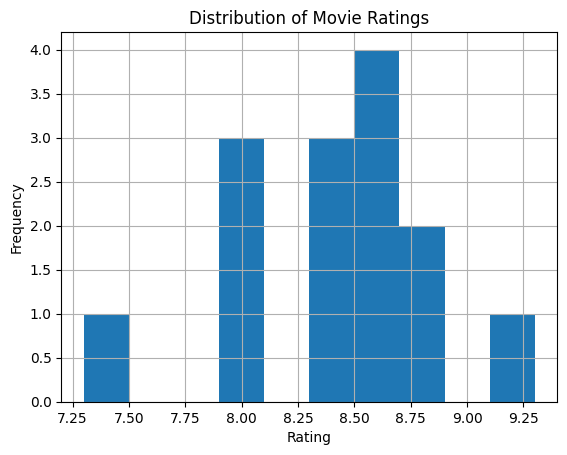

In [18]:
df['rating'].hist(bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.show()

## **Preprocessing of the text**

---



In [19]:
!pip install nltk
import nltk
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')
# Download the 'stopwords' resource
nltk.download('stopwords')
# Download the 'wordnet' resource
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
import pandas as pd

# assuming df is your DataFrame and categoryss is the column

# create a new column with the first categorys
df['categorys'] = df['category'].apply(lambda x: x[0] if isinstance(x, list) else x.split('|')[0] if x else None)

# drop the original categoryss column
df = df.drop('category', axis=1)

In [21]:
df['categorys']

,categorys
0,Action
1,Action
2,Animation
3,Drama
4,Action
5,Action
6,Science Fiction
7,Science Fiction
8,Drama
11,Drama


In [22]:
# # Define 'high' rating as IMDb score >= 7, otherwise 'low'
# df['categorys'] = df['categorys'].apply(lambda x: 'high' if x >= 8 else ('Medium' if 8>x>=5 else 'low'))
# # Drop 'imdb_score' from features as it's now represented by 'rating_category'
# df.drop('categorys', axis=1, inplace=True)
# # df['rating'] = df['imdb_score']

In [23]:
# # check labels in "rating" feature
# df.rating.unique()
# # check labels in "color" feature
# df.color.unique()

### **Encoding**

---



In [24]:
# df['categorys'].replace({'low':0, 'Medium':1, 'high':2}, inplace=True)
# df['color'].replace({'Black and White':0, 'Color':1}, inplace=True)

In [25]:
# Splitting into Train and Test Sets
# X Data
X = df.drop(['categorys'], axis=1)
# Select only numerical features for scaling
numerical_features = X.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]
print('X shape is : ' , X.shape)
print()
# y target
y = df['rating']
print('y shape is : ' , y.shape)
scaler = StandardScaler()
# Fit and transform only the numerical features
X_scaled = scaler.fit_transform(X_numerical)
# Create a new DataFrame with scaled numerical features
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)
# Concatenate scaled numerical features with non-numerical features
X_final = pd.concat([X.drop(columns=numerical_features), X_scaled], axis=1)

X shape is :  (14, 18)

y shape is :  (14,)


### **Train-Test Split**

---






In [26]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,shuffle=True)

# **SVM Model**


---





In [27]:
# # Model Training with Support Vector Machine (SVM)
# svm = SVC(kernel='linear', random_state=42)
# svm.fit(X_train, y_train)

In [28]:
# # Predictions and Evaluation
# y_pred = svm.predict(X_test)
# print(f" Accuracy: {accuracy_score(y_test, y_pred)*100:.2f} %")
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [29]:
# # إضافة imdb_score الافتراضي بناءً على التصنيف (تقدير تقريبي)
# df['rating'] = df['rating'].map({'high': 8.5, 'Medium': 6.5, 'low': 4.5})


# **cosine similarty**


---





In [30]:
# Combine relevant features into a single string for each movie
df['combined_features'] = df['categorys'] + ' ' + df['director'] + ' ' + df['actor_1'] + ' ' + df['actor_2'] + ' ' + df['actor_3']+ ' ' + df['actor_4']

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a DataFrame for movie titles and their indices
indices = pd.Series(df.index, index=df['name']).drop_duplicates()

In [31]:
# قائمة بالكلمات المحددة للمقارنة
keywords = ["director", "actor", "Similer"]

In [32]:
# دمج الميزات للحصول على مرشح المحتوى
df['combined_features'] = df['categorys'] + ' ' + df['director'] + ' ' + df['actor_1'] + ' ' + df['actor_2'] + ' ' + df['actor_3']+ ' ' + df['actor_4']


# **Recommendation System :-**


---










## **1.   Content-Based Filtering**




In [33]:
def content_based_recommendation(name, num_recommendations, categorys_filter=None):
    # **تحويل التقييمات إلى قيم فعلية بدلاً من تصنيفها إلى low/medium/high**
    user_ratings_numerical = np.array(user_ratings).reshape(-1, 1)

    model = NearestNeighbors(metric='cosine', algorithm='brute')
    model.fit(user_ratings_numerical)

    distances, indices = model.kneighbors(user_ratings_numerical[movie_index].reshape(1, -1), n_neighbors=num_recommendations + 1)
    movie_indices = indices.flatten()[1:]

    return df.iloc[movie_indices][['name', 'categorys', 'rating']]




## **2.   Collaborative Filtering**



In [34]:
def content_based_recommendation(name, num_recommendations=5, categorys_filter=None):
    # التحقق من وجود الفيلم
    if name not in df['name'].values:
        return "Movie title not found."

    # إيجاد رقم الصف للفيلم
    idx = df[df['name'] == name].index[0]

    # حساب التشابه
    cosine_sim = cosine_similarity(tfidf_matrix[idx], tfidf_matrix)

    # الحصول على ترتيب التشابه (من الأعلى إلى الأقل)، وتجاهل أول عنصر لأنه هو نفس الفيلم
    similar_indices = cosine_sim.argsort()[0][::-1][1:]  # استبعاد العنصر الأول

    # إذا كان هناك تصفية حسب الفئة
    if categorys_filter:
        similar_indices = [i for i in similar_indices if df.iloc[i]['categorys'] in categorys_filter]

    # أخذ عدد التوصيات المطلوب
    similar_indices = similar_indices[:num_recommendations]

    # إرجاع النتائج المطلوبة
    recommendations = df.iloc[similar_indices][['name', 'categorys']]
    return recommendations


  #####  **Natural Language Processing (NLP)**










In [35]:
# 3. Natural Language Processing (NLP)
nlp = pipeline('zero-shot-classification', model='facebook/bart-large-mnli')
categorys = df['categorys'].unique().tolist()

def interpret_user_request(user_input):
    result = nlp(user_input, categorys)
    detected_categorys = result['labels'][0]
    return detected_categorys

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu


## **3. Hybrid Recommendation System**









In [36]:
# def hybrid_recommendation(user_input, name=None, director=None, actor_name=None, num_recommendations=5):
#
def hybrid_recommendation(user_input, name=None, director=None, actor_name=None, num_recommendations=5):
    # استخراج النوع من الطلب
    detected_categorys = interpret_user_request(user_input)

    # توصيات حسب النوع
    if detected_categorys:
      categorys_recommendations = df[
            df['categorys'].apply(lambda x: detected_categorys.lower() in [g.strip().lower() for g in str(x).split(',')])
        ].sort_values(by='rating', ascending=False).head(num_recommendations)
    else:
        categorys_recommendations = pd.DataFrame()

    # توصيات حسب المخرج
    if director:
        director_recommendations = df[
            df['director'].str.contains(director, case=False, na=False)
        ].sort_values(by='rating', ascending=False).head(num_recommendations)
    else:
        director_recommendations = pd.DataFrame()

    # توصيات حسب الممثل
    if actor_name:
        actor_filter = (
            df['actor_1'].str.contains(actor_name, case=False, na=False) |
            df['actor_2'].str.contains(actor_name, case=False, na=False) |
            df['actor_3'].str.contains(actor_name, case=False, na=False)
        )
        actor_recommendations = df[actor_filter].sort_values(by='rating', ascending=False).head(num_recommendations)
    else:
        actor_recommendations = pd.DataFrame()

    # توصيات حسب فيلم مشابه
    if name:
        similar_movie_recommendations = content_based_recommendation(name, num_recommendations, detected_categorys)
    else:
        similar_movie_recommendations = pd.DataFrame()

    # دمج النتائج وتجنب التكرار
    recommendations = pd.concat([
        categorys_recommendations,
        director_recommendations,
        actor_recommendations,
        similar_movie_recommendations
    ])

    # Ensure categorys is string type
    recommendations['categorys'] = recommendations['categorys'].astype(str)

    recommendations = recommendations.drop_duplicates().sort_values(by='rating', ascending=False).head(num_recommendations)

    return recommendations[['name', 'categorys']]

# **Interact with user**

---



In [39]:
def chatbot():

    while True:
        user_input = input("\n👤 user: ").strip().lower()

        # أوامر الخروج
        if user_input in ["exit", "quit", "خروج"]:
            print(" Enjoy your movies! See you!")
            break

        # التحيات
        elif user_input in ["hello", "hi", "hey", "مرحبًا", "اهلا", "أهلاً"]:
            print("Hello! How can I help you?")
            continue

        # المساعدة
        elif user_input in ["can you help me", "help", "مساعدة", "هل يمكنك مساعدتي؟", "هل يمكنك مساعدتي"]:
            print(" Sure! I can help you find great movies based on your preferences.")
            continue

        # الشكر
        elif user_input in ["thank you", "thanks", "شكرًا", "شكرا"]:
            print("You're welcome! Enjoy watching movies.")
            continue

        # ما يستطيع البوت فعله
        elif user_input in ["what can you do", "what do you do", "what can you do?", "ماذا يمكنك أن تفعل", "ماذا تفعل"]:
            print("I can recommend movies based on your preferences. Just request by movie name, actor, director, or genre.")
            continue

        # البحث عن الفيلم
        name = next(
            (title for title in df['name'] if isinstance(title, str) and title.lower() in user_input),
            None
        )

        # البحث عن الممثل
        actor_list = pd.concat([
            df['actor_1'],
            df['actor_2'],
            df['actor_3']
        ]).dropna().unique()

        actor_name = next(
            (actor for actor in actor_list if isinstance(actor, str) and actor.lower() in user_input),
            None
        )

        # البحث عن المخرج
        director_name = next(
            (director for director in df['director'].dropna().unique()
             if isinstance(director, str) and director.lower() in user_input),
            None
        )
        # البحث عن النوع (genre/categorys)
        genres = df['categorys'].dropna().unique()
        genre_match = next(
            (genre for genre in genres if isinstance(genre, str) and genre.lower() in user_input),
            None
        )

        # التوصية بناءً على النوع
                # التوصية بناءً على النوع
        if genre_match:
            genre_movies = df[df['categorys'].str.lower() == genre_match.lower()]
            if not genre_movies.empty:
                print(f"\nMovies of the type{genre_match}:")
                print(genre_movies[['name', 'categorys']].dropna().head(10).to_string(index=False))
            else:
                print(f"I didn't find any movies for{genre_match}.")
            continue  # <--- أضف هذا السطر

        # التوصية بناءً على الممثل
        if actor_name:
            actor_movies = df[
                (df['actor_1'].str.contains(actor_name, case=False, na=False)) |
                (df['actor_2'].str.contains(actor_name, case=False, na=False)) |
                (df['actor_3'].str.contains(actor_name, case=False, na=False))
            ]
            if not actor_movies.empty:
                print(f"\nMovies he appears in{actor_name}:")
                print(actor_movies[['name', 'categorys']].dropna().to_string(index=False))
            else:
                print(f"I didn't find any movies for{actor_name}.")
            continue

        # التوصية بناءً على المخرج
        elif director_name: # Changed directorBlockingIOError to director_name
            director_movies = df[
                df['director'].str.contains(director_name, case=False, na=False) # Changed director to director_name
            ]
            if not director_movies.empty:
                print(f"\n🎬 movies directed by{director_name}:")
                print(director_movies[['name', 'categorys']].dropna().to_string(index=False)) # Changed category to categorys for consistency
            else:
                print(f" I didn't find any movies directed by{director_name}.") # Changed director to director_name
            continue

        # التوصية بناءً على فيلم معين
        elif name:
                recommendations = hybrid_recommendation(user_input, name=name, num_recommendations=5)
                if not recommendations.empty:
                  print("\nHere are some recommendations:")
                  print(recommendations.to_string(index=False))
                else:
                  print("I couldn't find any recommendations based on your request. Please be more specific!")
                continue

        # إذا لم يتم التعرف على المدخل
        else:
            print("🤖Sorry, I didn't understand your request. Please explain more.")


# لتشغيل الشات بوت
chatbot()


👤 user: HELLO
Hello! How can I help you?

👤 user: i want action movie

Movies of the typeAction:
             name categorys
Avengers: Endgame    Action
    Black Panther    Action
        Gladiator    Action
           Gunner    Action

👤 user: i want drama movie

Movies of the typeDrama:
                    name categorys
            Forrest Gump     Drama
                   Joker     Drama
                Parasite     Drama
The Shawshank Redemption     Drama
                 Titanic     Drama

👤 user: i want movie directed by Anthony Russo

🎬 movies directed byAnthony Russo:
             name categorys
Avengers: Endgame    Action

👤 user: i want movie for Gary Sinise

Movies he appears inGary Sinise:
        name categorys
Forrest Gump     Drama

👤 user: i want Animation movie 

Movies of the typeAnimation:
name categorys
Coco Animation

👤 user: bjkmjdbj
🤖Sorry, I didn't understand your request. Please explain more.

👤 user: thanks
You're welcome! Enjoy watching movies.

👤 user: ex